In [1]:
import sys
import numpy as np
from astropy.io import fits
from aspired import image_reduction
from aspired import spectral_reduction

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


isis_pso1801p6254_g93m48_raw/r2700959.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700959.fit.gz
isis_pso1801p6254_g93m48_raw/r2700960.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700960.fit.gz
isis_pso1801p6254_g93m48_raw/r2700961.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700961.fit.gz
isis_pso1801p6254_g93m48_raw/r2700982.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700982.fit.gz
isis_pso1801p6254_g93m48_raw/r2700984.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700984.fit.gz
isis_pso1801p6254_g93m48_raw/r2700986.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700986.fit.gz
isis_pso1801p6254_g93m48_raw/r2701247.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2701247.fit.gz
isis_pso1801p6254_g93m48_raw/r2701248.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2701248

/Users/marcolam/git/ASPIRED/aspired/image_reduction.py:536: UserWarning: No dark frames. Dark subtraction is not performed.
  warnings.warn('No dark frames. Dark subtraction is not '
/Users/marcolam/git/ASPIRED/aspired/image_reduction.py:749: RuntimeWarning: divide by zero encountered in log10
  fig = go.Figure(data=go.Heatmap(z=np.log10(self.light_master),
/Users/marcolam/git/ASPIRED/aspired/image_reduction.py:749: RuntimeWarning: invalid value encountered in log10
  fig = go.Figure(data=go.Heatmap(z=np.log10(self.light_master),


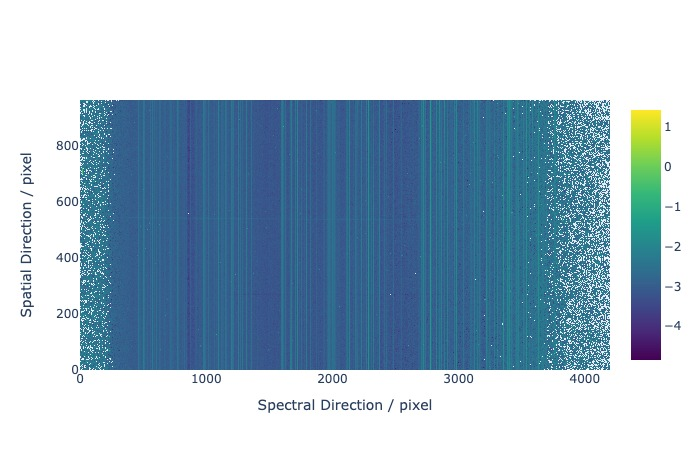

isis_pso1801p6254_g93m48_raw/r2700959.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700959.fit.gz
isis_pso1801p6254_g93m48_raw/r2700960.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700960.fit.gz
isis_pso1801p6254_g93m48_raw/r2700961.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700961.fit.gz
isis_pso1801p6254_g93m48_raw/r2700982.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700982.fit.gz
isis_pso1801p6254_g93m48_raw/r2700984.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700984.fit.gz
isis_pso1801p6254_g93m48_raw/r2700986.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2700986.fit.gz
isis_pso1801p6254_g93m48_raw/r2701259.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2701259.fit.gz
isis_pso1801p6254_g93m48_raw/r2701261.fit.gz
/Users/marcolam/git/ASPIRED-example/isis_pso1801p6254_g93m48_raw/r2701261

/Users/marcolam/git/ASPIRED/aspired/image_reduction.py:536: UserWarning:

No dark frames. Dark subtraction is not performed.

/Users/marcolam/git/ASPIRED/aspired/image_reduction.py:749: RuntimeWarning:

divide by zero encountered in log10

/Users/marcolam/git/ASPIRED/aspired/image_reduction.py:749: RuntimeWarning:

invalid value encountered in log10



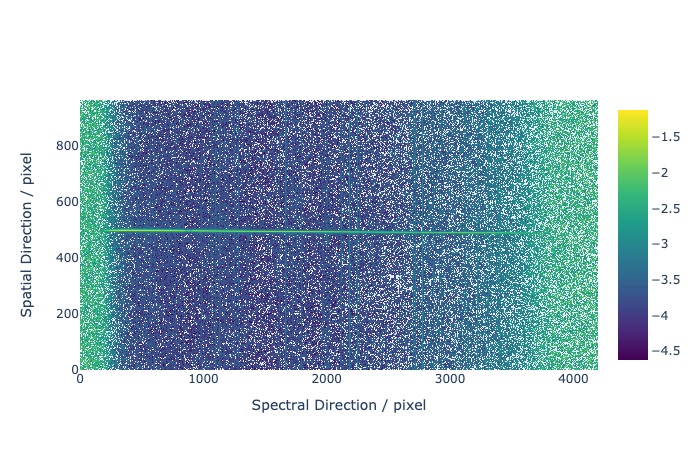

In [2]:
# Set the spectral and spatial direction
Saxis = 0

science_frame = image_reduction.ImageReduction('isis_pso1801p6254.list', saxis=Saxis)
science_frame.reduce()
science_frame.inspect(renderer='jpg', filename='reduced_image_pso1801p6254', save_iframe=True)
#science_frame.savefits(overwrite=True)

standard_frame = image_reduction.ImageReduction('isis_g93m48.list', saxis=Saxis)
standard_frame.reduce()
standard_frame.inspect(renderer='jpg', filename='reduced_image_g93m48', save_iframe=True)

In [3]:
# spec mask
spatial_mask = np.arange(450, 650)

# initialise the two spectral_reduction.TwoDSpec()
pso = spectral_reduction.TwoDSpec(
    science_frame,
    spatial_mask=spatial_mask,
    readnoise=4.5,
    cosmicray=False,
    gain=0.98,
    seeing=1.1,
    silence=True
)
g93 = spectral_reduction.TwoDSpec(
    standard_frame,
    spatial_mask=spatial_mask,
    readnoise=4.5,
    cosmicray=False,
    gain=0.98,
    seeing=1.1,
    silence=True
)

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:2196: RuntimeWarning:

divide by zero encountered in log10

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:2196: RuntimeWarning:

invalid value encountered in log10



/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:2886: RuntimeWarning:

divide by zero encountered in log10

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:2886: RuntimeWarning:

invalid value encountered in log10



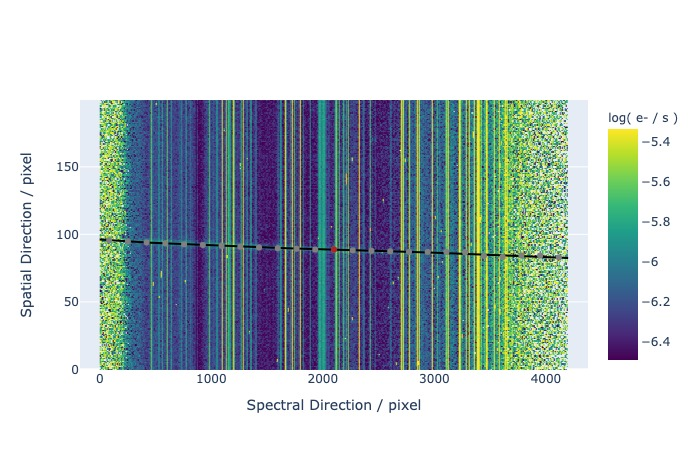

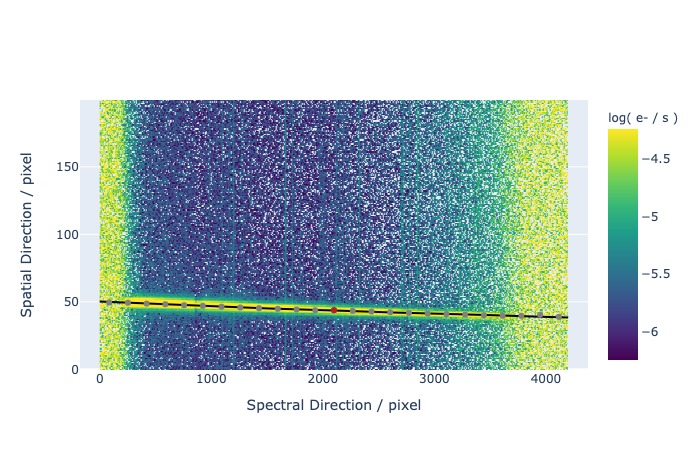

In [4]:
# automatically trace the spectrum
pso.ap_trace(display=True, renderer='jpg', save_iframe=True, filename='pso_trace')
g93.ap_trace(display=True, renderer='jpg', save_iframe=True, filename='g93_trace')

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:2560: RuntimeWarning:

invalid value encountered in double_scalars

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:3367: RuntimeWarning:

divide by zero encountered in log10

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:3367: RuntimeWarning:

invalid value encountered in log10



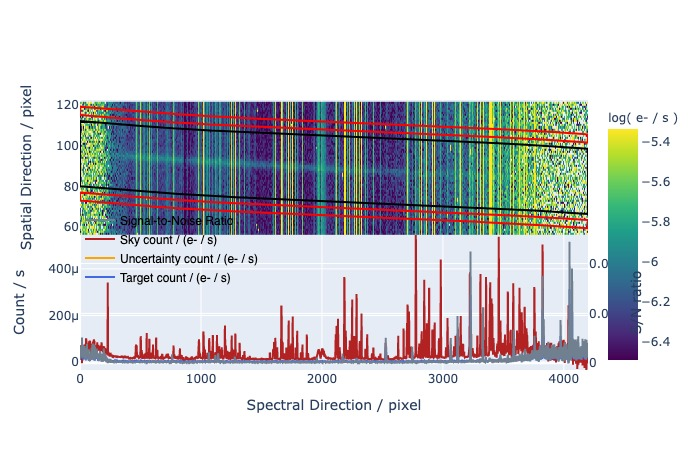

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:3367: RuntimeWarning:

divide by zero encountered in log10

/Users/marcolam/git/ASPIRED/aspired/spectral_reduction.py:3367: RuntimeWarning:

invalid value encountered in log10



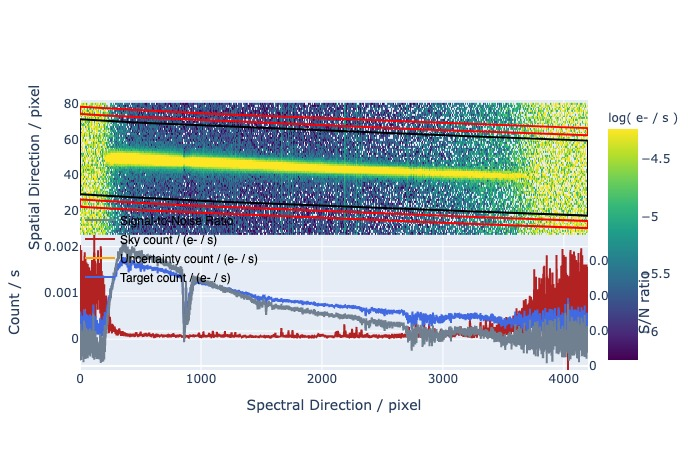

In [5]:
# Optimal extracting spectrum by summing over the aperture along the trace
pso.ap_extract(
    apwidth=15,
    optimal=True,
    display=True,
    renderer='jpg',
    save_iframe=True,
    filename='pso_extract')
g93.ap_extract(
    apwidth=20,
    skysep=3,
    skywidth=5,
    skydeg=1,
    optimal=True,
    display=True,
    renderer='jpg',
    save_iframe=True,
    filename='g93_extract')

In [6]:
pso_reduced = spectral_reduction.OneDSpec()
pso_reduced.from_twodspec(pso, stype='science')
pso_reduced.from_twodspec(g93, stype='standard')

pso_reduced.add_arc(np.transpose(science_frame.arc_master), stype='science')
pso_reduced.add_arc(np.transpose(standard_frame.arc_master), stype='standard')

pso_reduced.apply_twodspec_mask_to_arc(stype='science+standard')

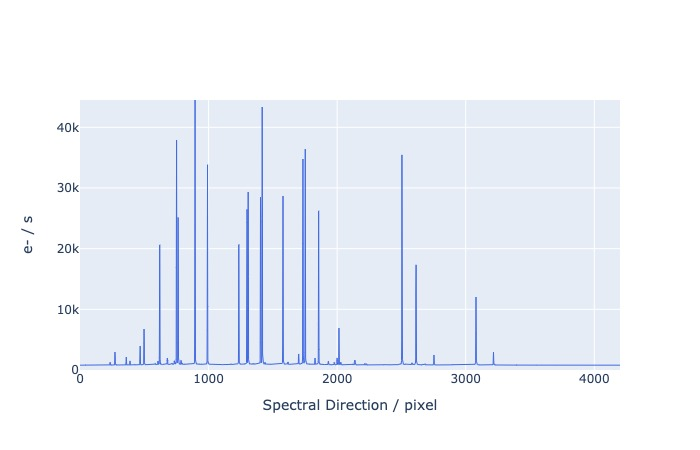

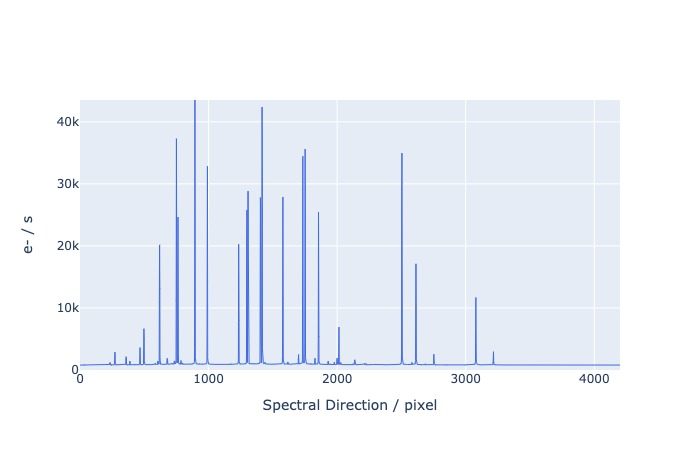

In [7]:
pso_reduced.extract_arc_spec(
    display=True,
    stype='science+standard',
    renderer='jpg',
    save_iframe=True,
    filename='arc_spec')

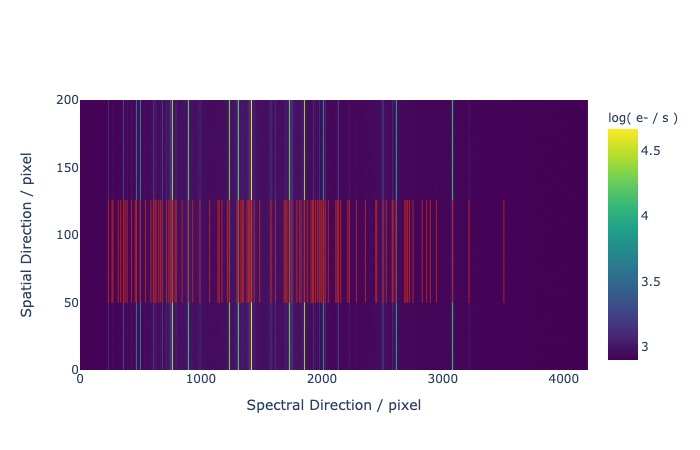

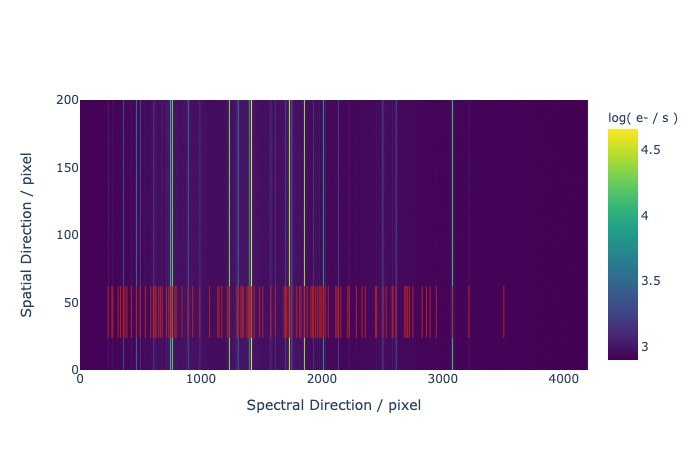

In [8]:
pso_reduced.find_arc_lines(
    display=True,
    stype='science+standard',
    renderer='jpg',
    save_iframe=True,
    filename='arc_lines')

In [9]:
pso_reduced.initialise_calibrator(stype='science+standard')
pso_reduced.set_hough_properties(
    min_wavelength=7000.,
    max_wavelength=10500.,
    stype='science+standard')
pso_reduced.add_atlas(
    elements=["Cu", "Ne", 'Ar'],
    stype='science+standard')
pso_reduced.do_hough_transform()

INFO:rascal.calibrator:num_pix is set to None.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.
INFO:rascal.calibrator:num_pix is set to None.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.


In [10]:
pso_reduced.fit(max_tries=1000, stype='science+standard')

In [11]:
pso_reduced.apply_wavelength_calibration(stype='science+standard')

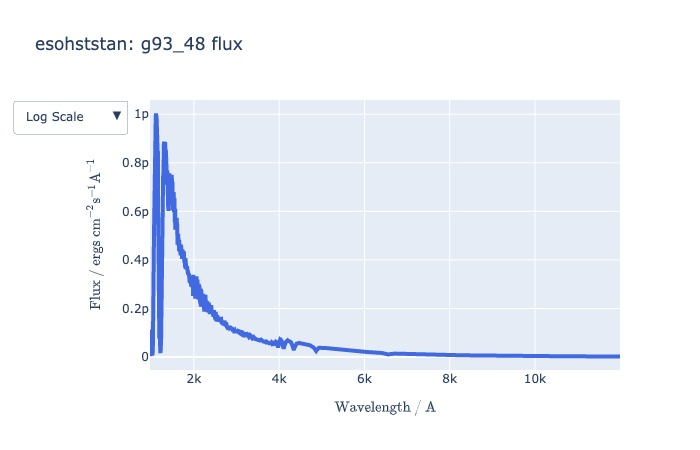

In [12]:
pso_reduced.load_standard(
    target='g93_48',
    library='esohststan',
    cutoff=0.4,
)
pso_reduced.inspect_standard(renderer='jpg', save_iframe=True, filename='literature_standard')

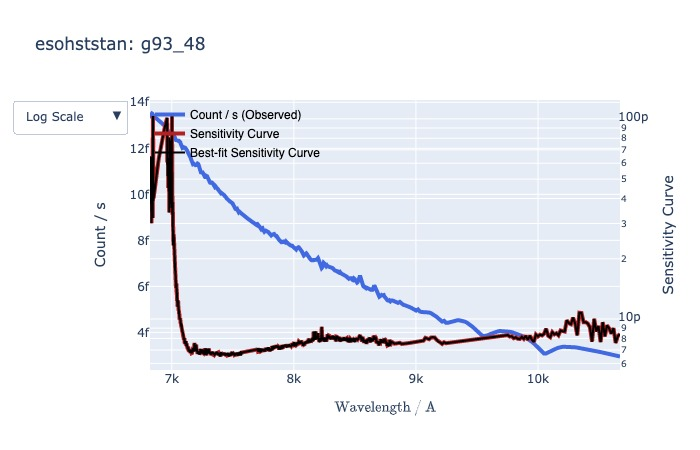

In [13]:
pso_reduced.compute_sensitivity(kind='cubic')
pso_reduced.inspect_sensitivity(renderer='jpg', save_iframe=True, filename='sensitivity')

In [14]:
pso_reduced.apply_flux_calibration(stype='science+standard')

In [15]:
pso_reduced.inspect_reduced_spectrum(
    wave_min=7000.,
    wave_max=10500.,
    stype='science',
    save_iframe=True,
    filename='pso_reduced_spectrum')

In [16]:
pso_reduced.inspect_reduced_spectrum(
    wave_min=7000.,
    wave_max=10500.,
    stype='standard',
    save_iframe=True,
    filename='g93_reduced_spectrum')